---

# Generic Conditional Laws for Random-Fields - via:

## Universal $\mathcal{P}_1(\mathbb{R})$-Deep Neural Model (Type A)

---

By: [Anastasis Kratsios](https://people.math.ethz.ch/~kratsioa/) - 2021.

---

# Training Algorithm:
---
## 1) Generate Data:
Generates the empirical measure $\sum_{n=1}^N \delta_{X_T(\omega_n)}$ of $X_T$ conditional on $X_0=x_0\in \mathbb{R}$ *($x_0$ and $T>0$ are user-provided)*.

## 2) Get "Sample Barycenters":
Let $\{\mu_n\}_{n=1}^N\subset\mathcal{P}_1(\mathbb{R}^d)$.  Then, the *sample barycenter* is defined by:
1. $\mathcal{M}^{(0)}\triangleq \left\{\hat{\mu}_n\right\}_{n=1}^N$,
2. For $1\leq n\leq \mbox{N sample barycenters}$: 
    - $
\mu^{\star}\in \underset{\tilde{\mu}\in \mathcal{M}^{(n)}}{\operatorname{argmin}}\, \sum_{n=1}^N \mathcal{W}_1\left(\mu^{\star},\mu_n\right),
$
    - $\mathcal{M}^{(n)}\triangleq \mathcal{M}^{(n-1)} - \{\mu^{\star}\},$
*i.e., the closest generated measure form the random sample to all other elements of the random sample.*

---
**Note:** *We simplify the computational burden of getting the correct classes by putting this right into this next loop.*

## 3) Train Deep Classifier:
$\hat{f}\in \operatorname{argmin}_{f \in \mathcal{NN}_{d:N}^{\star}} 
\sum_{x \in \mathbb{X}}
\, 
\mathbb{H}
\left(
    \operatorname{Softmax}_N\circ f(x)_n| I\left\{W_1(\hat{\mu}_n,\mu_x),\inf_{m\leq N} W_1(\hat{\mu}_m,\mu_x)\right\}
\right);
$
where $\mathbb{H}$ is the categorical cross-entropy.  

---
---
---
## Notes - Why the procedure is so computationally efficient?
---
 - The sample barycenters do not require us to solve for any new Wasserstein-1 Barycenters; which is much more computationally costly,
 - Our training procedure never back-propages through $\mathcal{W}_1$ since steps 2 and 3 are full-decoupled.  Therefore, training our deep classifier is (comparatively) cheap since it takes values in the standard $N$-simplex.

---

## Meta-Parameters

### Simulation

#### Ground Truth:
*The build-in Options:*
- rSDE 
- pfBM
- 2lnflow

In [1]:
# Option 1:
groud_truth = "rSDE"
# Option 2:
# groud_truth = "2lnflow"
## Option 3:
# groud_truth = "pfBM"

#### Grid Hyperparameter(s)

In [2]:
## Monte-Carlo
N_Euler_Maruyama_Steps = 10*2
N_Monte_Carlo_Samples = 10**3
N_Monte_Carlo_Samples_Test = 10**3 # How many MC-samples to draw from test-set?

# End times for Time-Grid
T_end = 1
T_end_test = 1.1


## Grid
N_Grid_Finess = 10*2
Max_Grid = 0.5
x_0 = 1

# Number of Centers (\hat{\mu}_s)
N_Quantizers_to_parameterize = 200

This option sets $\delta$ in $B_{\mathbb{R}\times [0,\infty)}(\hat{x}_n,\delta)$; where $\hat{x}_n\in \nu_{\cdot}^{-1}[\hat{\mu}]$.  N_measures_per_center sets the number of samples to draw in this ball...by construction the training set is $\delta$-bounded and $\nu_{(x,t)}$, for any such $x$ is $\omega_{\nu_{\cdot}}(\delta)$-bounded in $\mathcal{P}_1(\mathbb{R})$.

In [3]:
# Hyper-parameters of Cover
delta = 0.1
N_measures_per_center = 10**2

**Note**: Setting *N_Quantizers_to_parameterize* prevents any barycenters and sub-sampling.

#### Mode: Code-Testin Parameter(s)
- True: $\Rightarrow$ cross validation through grid of very mild parameters just to test hardward or software.
- False: $\Rightarrow$ run CV-grid.

In [4]:
trial_run = False

### Meta-parameters
Ratio $\frac{\text{Testing Datasize}}{\text{Training Datasize}}$.

In [5]:
test_size_ratio = .25

## Simulation from Rough SDE
Simulate via Euler-M method from:
$$ 
X_T^x = x + \int_0^T \alpha(t,X_t^x)dt + \int_0^T((1-\eta)\beta(t,X_t^x)dW_t + \eta B_T^H.
$$

### Drift

In [6]:
def alpha(t,x):
    return .1

### Volatility

In [7]:
def beta(t,x):
    return .01

### Roughness Meta-parameters
 - Roughness is $H$,
 - Ratio_fBM_to_typical_vol is $\eta$.

In [8]:
Rougness = 0.9 # Hurst Parameter
Ratio_fBM_to_typical_vol = 0.5# $\eta$ in equation above.

## Simulation from Measure-Valued $2$-Parameter Log-Gaussian Flow
$$
X_{t,x} \sim \log\text{-}\mathcal{N}\left(\alpha(t,x),\beta(t,x)\right).
$$

**Note:** *$\alpha$ and $\beta$ are specified below in the SDE Example*.

In [9]:
# Run Backend
# %run Universal_Processes_Trainer_BACKEND.ipynb
exec(open('Universal_Processes_Trainer_BACKEND.py').read())

Using TensorFlow backend.
  0%|          | 0/14 [00:00<?, ?it/s]

Deep Feature Builder - Ready
Deep Classifier - Ready
Building Training + Testing Set - rough-SDE Ground-Truth


/scratch/users/kratsioa/.local/lib/python3.7/site-packages/fbm/fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "
100%|██████████| 14/14 [00:12<00:00,  1.16it/s]

Deep Feature Builder - Ready
Deep Classifier - Ready
Training Classifer Portion of Type-A Model
Fitting 4 folds for each of 5 candidates, totalling 20 fits



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   17.9s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   25.6s
[Parallel(n_jobs=4)]: Done  16 out of  20 | elapsed:   33.4s remaining:    8.4s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   40.7s finished


Epoch 1/200
7/7 [==============================] - 0s 2ms/step - loss: 2.6246 - accuracy: 0.0714
Epoch 2/200
7/7 [==============================] - 0s 2ms/step - loss: 2.5777 - accuracy: 0.1190
Epoch 3/200
7/7 [==============================] - 0s 2ms/step - loss: 2.5116 - accuracy: 0.1286
Epoch 4/200
7/7 [==============================] - 0s 2ms/step - loss: 2.4302 - accuracy: 0.1619
Epoch 5/200
7/7 [==============================] - 0s 2ms/step - loss: 2.3264 - accuracy: 0.2143
Epoch 6/200
7/7 [==============================] - 0s 2ms/step - loss: 2.2103 - accuracy: 0.2190
Epoch 7/200
7/7 [==============================] - 0s 2ms/step - loss: 2.0851 - accuracy: 0.2238
Epoch 8/200
7/7 [==============================] - 0s 2ms/step - loss: 1.9561 - accuracy: 0.2095
Epoch 9/200
7/7 [==============================] - 0s 2ms/step - loss: 1.8252 - accuracy: 0.2905
Epoch 10/200
7/7 [==============================] - 0s 2ms/step - loss: 1.7158 - accuracy: 0.3095
Epoch 11/200
7/7 [===========

7/7 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 1.0000
Epoch 85/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 1.0000
Epoch 86/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 1.0000
Epoch 87/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 1.0000
Epoch 88/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 1.0000
Epoch 89/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 1.0000
Epoch 90/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 1.0000
Epoch 91/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 92/200
7/7 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 1.0000
Epoch 93/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 94/200
7/7 [===============

7/7 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 168/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 169/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 170/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 171/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 172/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 173/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 174/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 175/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 176/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 177/200
7/7 [=====

  0%|          | 0/14 [00:00<?, ?it/s]

Training Classifer Portion of Type-A Model: Done!
#---------------------------------------#
Building Training Set (Regression): START
#---------------------------------------#


  0%|          | 0/209 [00:00<?, ?it/s]

#-------------------------------------#
Building Training Set (Regression): END
#-------------------------------------#
#-------------------------------------#
Building Test Set (Predictions): START
#-------------------------------------#
#-----------------------------------#
Building Test Set (Predictions): END
#-----------------------------------#
#-----------------------------#
Building Barycenters Set: START
#-----------------------------#
#-----------------------------#
Building Barycenters Set: END
#-----------------------------#
Building Training Set Performance Metrics


 46%|████▌     | 32/70 [00:00<00:00, 313.07it/s]

Building Test Set Performance Metrics


100%|██████████| 70/70 [00:00<00:00, 338.04it/s]


#----------------------#
Training-Set Performance
#----------------------#
            W1  E[X']-E[X]  (E[X'^2]-E[X^2])^.5  (E[X'^3]-E[X^3])^(1/3)  \
Min 7.3843E-06  4.7115E-06           1.7736E-10              2.6328E-02   
MAE 4.4803E-01  4.7269E-03           4.8590E-03              4.4825E-01   
Max 7.1951E+00  1.7033E-02           2.8952E-02              8.0783E-01   

     (E[X'^4]-E[X^4])^.25  
Min            6.6176E-02  
MAE            6.3243E-01  
Max            1.1111E+00  
 
 
 
#------------------#
Test-Set Performance
#------------------#
            W1  E[X']-E[X]  (E[X'^2]-E[X^2])^.5  (E[X'^3]-E[X^3])^(1/3)  \
Min 7.3844E-06  4.7115E-06           1.7736E-10              2.6328E-02   
MAE 5.2087E-02  1.5613E-03           8.6918E-05              2.1256E-01   
Max 2.1803E-01  6.4724E-03           4.9121E-04              4.1599E-01   

     (E[X'^4]-E[X^4])^.25  
Min            6.6176E-02  
MAE            3.5407E-01  
Max            6.6779E-01  
 
 
 


# Visualization
*From hereon out...do nothing and just let the backend sript run...the images and tables will load :).*

Example Noises
Example Paths
Visualization of Training-Set Performance


No handles with labels found to put in legend.


Visualizing Training Predictions vs. Ground-Truth (Training Set)


No handles with labels found to put in legend.


Visualization of Test-Set Performance
Visualizing Training Predictions vs. Ground-Truth (Testing Set)
Visualizing Predictions Erros (Training Set)
Visualizing Predictions Erros (Test Set)


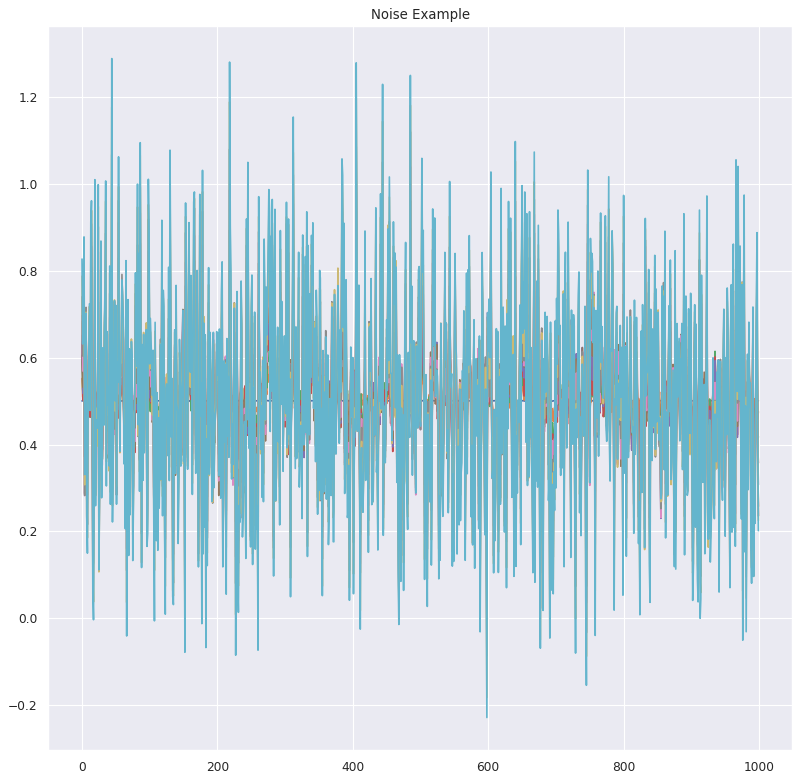

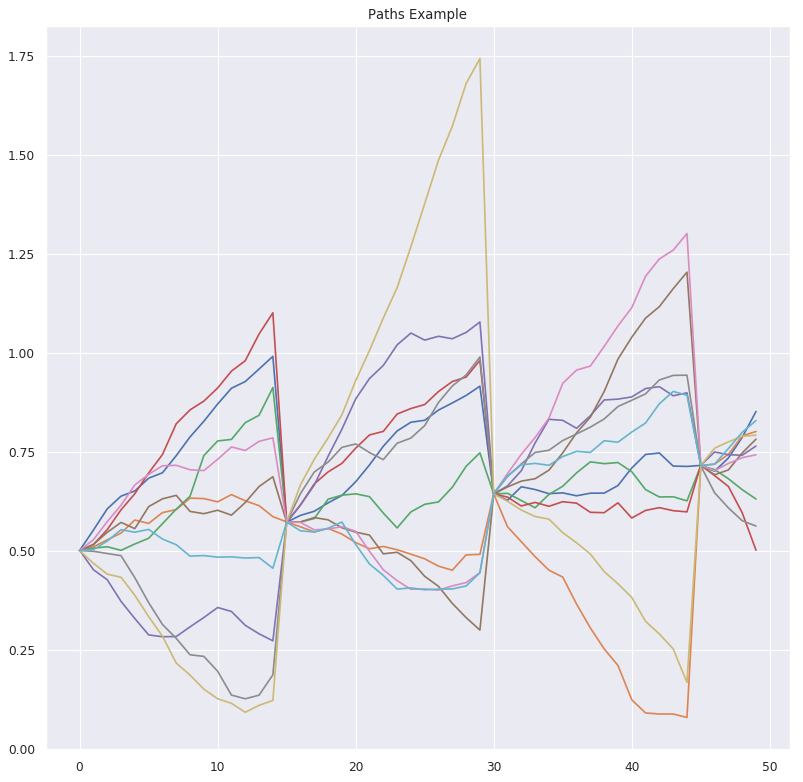

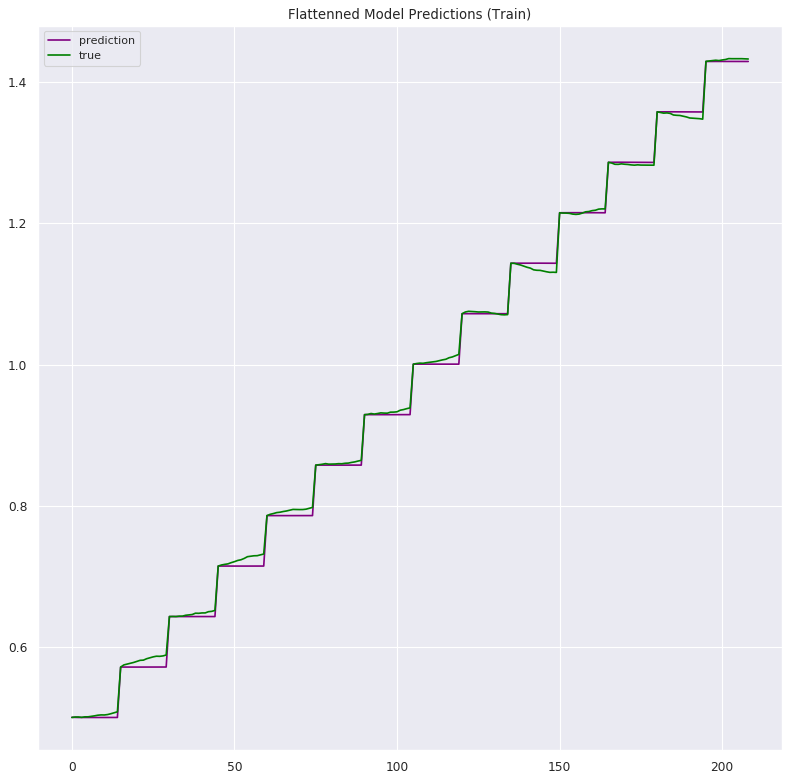

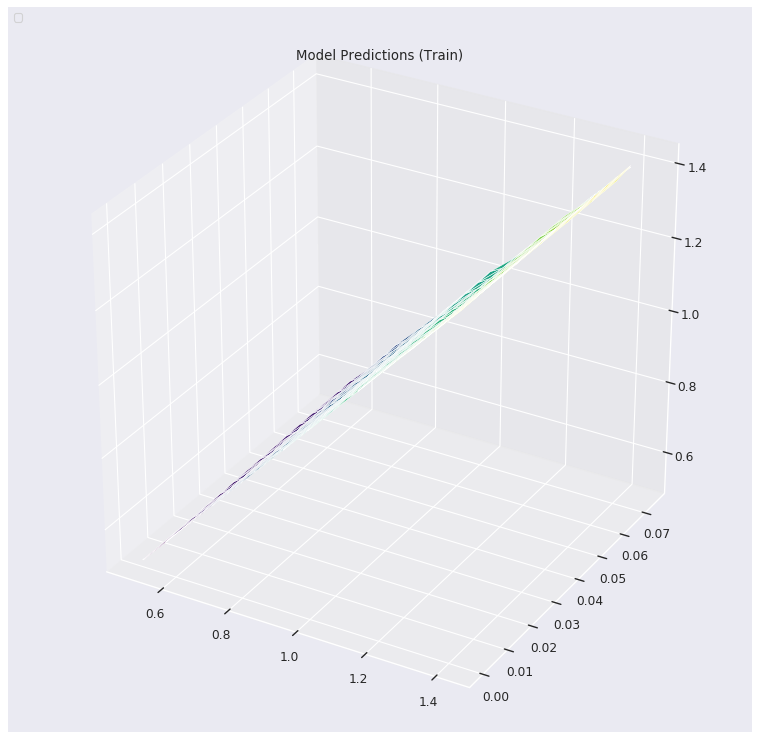

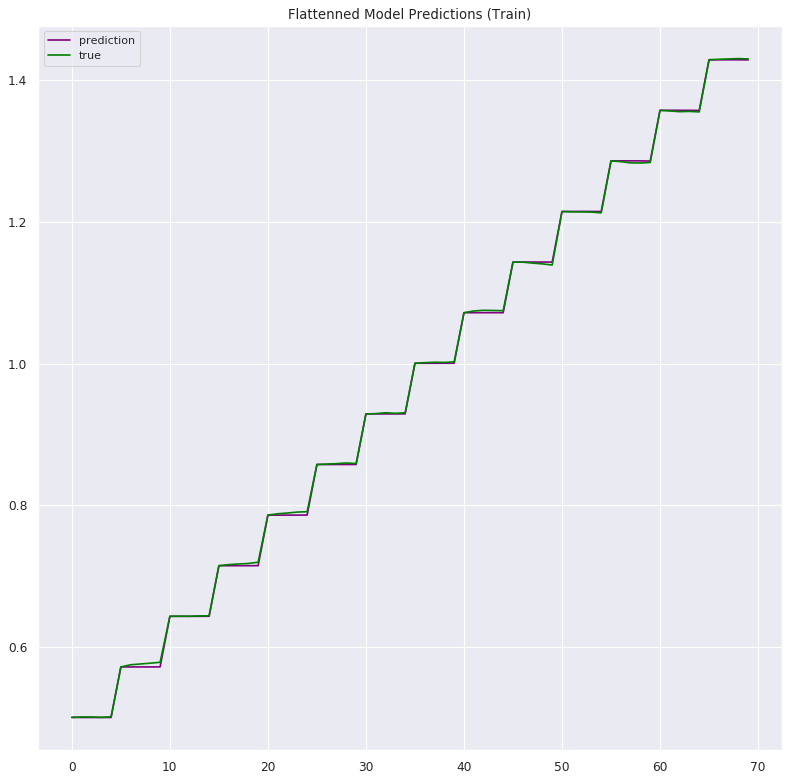

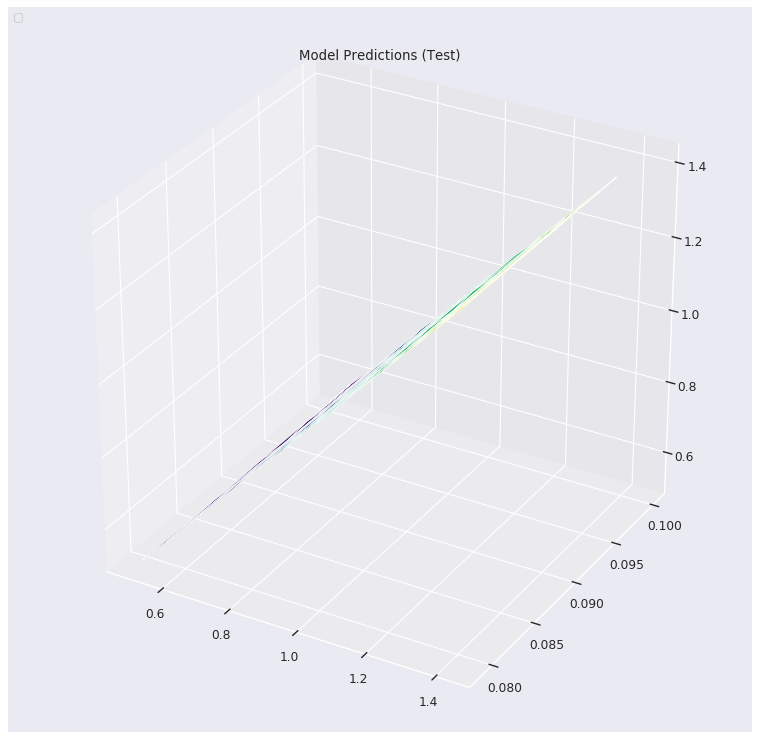

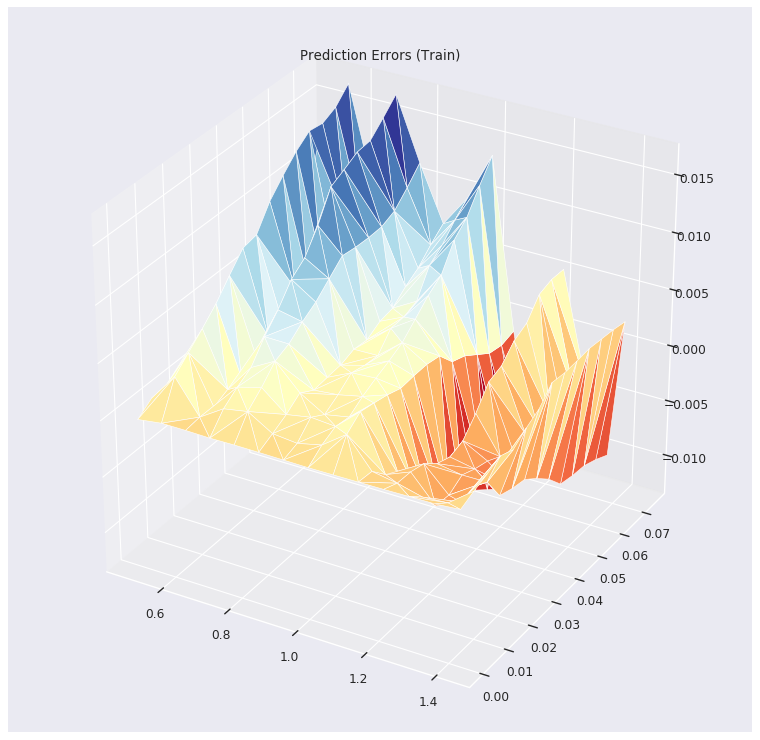

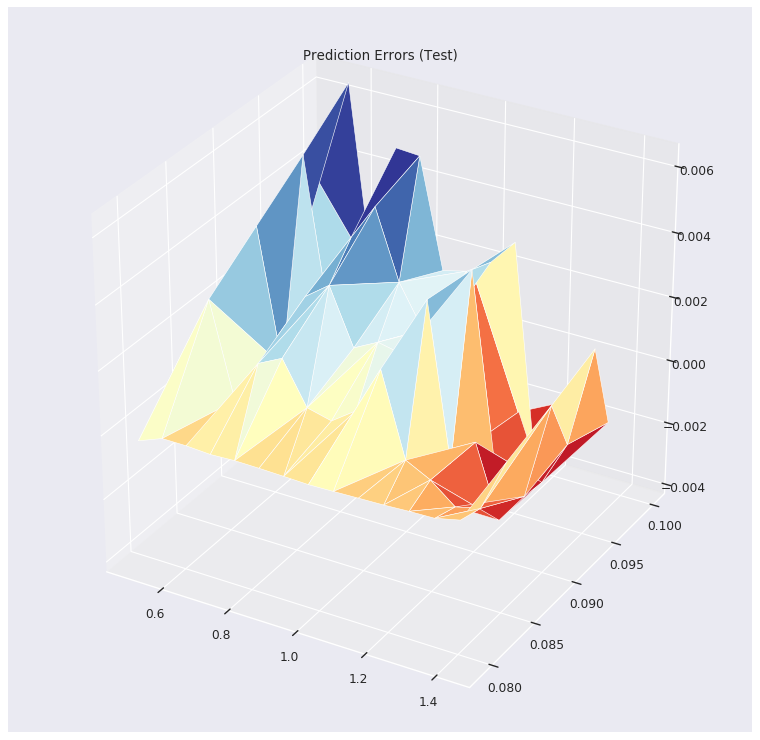

In [10]:
# Run Backend
# %run Universal_Processes_Trainer_Visuals.ipynb
exec(open('Universal_Processes_Trainer_Visuals.py').read())

## Update User
We empirically estimate the standard error and confidence intervals or the relevant error distributions using the method of this paper: [Bootstrap Methods for Standard Errors, Confidence Intervals, and Other Measures of Statistical Accuracy - by: B. Efron and R. Tibshirani ](https://www.jstor.org/stable/2245500?casa_token=w_8ZaRuo1qwAAAAA%3Ax5kzbYXzxGSWj-EZaC10XyOVADJyKQGXOVA9huJejP9Tt7fgMNhmPhj-C3WdgbB9AEZdqjT5q_azPmBLH6pDq61jzVFxV4XxqBuerQRBLaaOFKcyr0s&seq=1#metadata_info_tab_contents)

### Training-Set Performance

In [11]:
Type_A_Prediction

,W1,E[X']-E[X],(E[X'^2]-E[X^2])^.5,(E[X'^3]-E[X^3])^(1/3),(E[X'^4]-E[X^4])^.25
Min,7.3843E-06,4.7115E-06,1.7736E-10,2.6328E-02,6.6176E-02
MAE,4.4803E-01,4.7269E-03,4.8590E-03,4.4825E-01,6.3243E-01
Max,7.1951E+00,1.7033E-02,2.8952E-02,8.0783E-01,1.1111E+00


#### Predictions

In [12]:
Type_A_Predictions_and_confidence.T

,CL,Mean,CU
W1_99_Train,-1.0093E-02,1.1906E-01,2.2437E-01
W1error_99_Train,-6.9587E-02,1.1906E-01,2.5827E-01
M_95_Train,9.2464E-01,9.6258E-01,1.0015E+00
M_99_Train,9.1062E-01,9.6258E-01,1.0152E+00
MC_95_Train,9.2911E-01,9.6487E-01,1.0056E+00
MC_99_Train,9.1322E-01,9.6487E-01,1.0195E+00


### Test-Set Performance

In [13]:
Type_A_Prediction_test

,W1,E[X']-E[X],(E[X'^2]-E[X^2])^.5,(E[X'^3]-E[X^3])^(1/3),(E[X'^4]-E[X^4])^.25
Min,7.3844E-06,4.7115E-06,1.7736E-10,2.6328E-02,6.6176E-02
MAE,5.2087E-02,1.5613E-03,8.6918E-05,2.1256E-01,3.5407E-01
Max,2.1803E-01,6.4724E-03,4.9121E-04,4.1599E-01,6.6779E-01


#### Predictions

In [14]:
Type_A_Predictions_and_confidence_test.T

,CL,Mean,CU
W1_99_Test,4.0234E-02,5.2087E-02,6.3362E-02
W1error_99_Test,3.7426E-02,5.2087E-02,6.9714E-02
M_95_Test,8.9746E-01,9.6480E-01,1.0291E+00
M_99_Test,8.8215E-01,9.6480E-01,1.0556E+00
MC_95_Test,9.0079E-01,9.6555E-01,1.0334E+00
MC_99_Test,8.7407E-01,9.6555E-01,1.0562E+00


### Model Complexity

In [15]:
Model_Complexity

,N_Centers,N_Q,N_Params,Training Time,T_Test/T_Test-MC,Time Test,Time EM-MC
Model_Complexity_metrics,14,1000,83814,5.7249E+01,3.7473E-03,4.5170E-02,1.2054E+01


---

---
# Fin
---

---